In [1]:
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np

In [17]:
df1=pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)

In [18]:
df=df1.copy()

In [19]:
df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0,0,0.0,98.0,1.0,1.0,SmallTablet,Windows.Desktop,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,Notebook,8.0,800.0,1280.0,Slate,1.420000e+02,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0,26,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,AllInOne,Windows.Desktop,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,AllinOne,19.4,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,Desktop,24.0,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,0.0,108.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,windows10,x86,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,Desktop,20.0,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.285,x86,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,37.0,158,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,628.0

In [20]:
# Identify columns with missing values
columns_with_missing = df.columns[df.isnull().any()]


In [27]:
columns_with_missing

Index(['RealTimeProtectionState', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'CityID', 'IsSystemProtected', 'SMode', 'IEVersionID',
       'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'TotalPhysicalRAMMB', 'ChassisType', 'PrimaryDisplayDiagonalInches',
       'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges',
       'OSInstallLanguageID', 'IsFlightsDisabled', 'FirmwareManufacturerID',
       'FirmwareVersionID', 'IsVirtualDevice',
       'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier',
       'DateOS'],
      dtype='object')

In [38]:
df_num=df.select_dtypes(include=['number']).columns
df_obj=df.select_dtypes(include=['object']).columns
df_obj

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion',
       'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName',
       'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType', 'ChassisType',
       'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch',
       'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
       'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
       'FlightRing', 'DateAS', 'DateOS'],
      dtype='object')

In [23]:
si=SimpleImputer(missing_values=np.nan, strategy='mode')

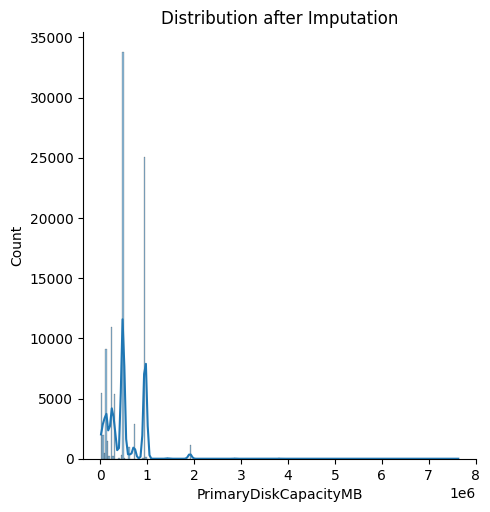

In [12]:
# Example for numerical column comparison before & after imputation
sns.displot(df['PrimaryDiskCapacityMB'], kde=True)
plt.title('Distribution after Imputation')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

                                    Missing Values  Percent (%)
SMode                                          981        0.981
CityID                                         623        0.623
RegionIdentifier                               559        0.559
IsGamer                                        559        0.559
InternalBatteryNumberOfCharges                 515        0.515
FirmwareManufacturerID                         376        0.376
FirmwareVersionID                              334        0.334
IsFlightsDisabled                              326        0.326
OEMModelID                                     228        0.228
OEMNameID                                      212        0.212
FirewallEnabled                                166        0.166
TotalPhysicalRAMMB                             151        0.151
IsAlwaysOnAlwaysConnectedCapable               134        0.134
OSInstallLanguageID                            113        0.113
SystemVolumeCapacityMB                  

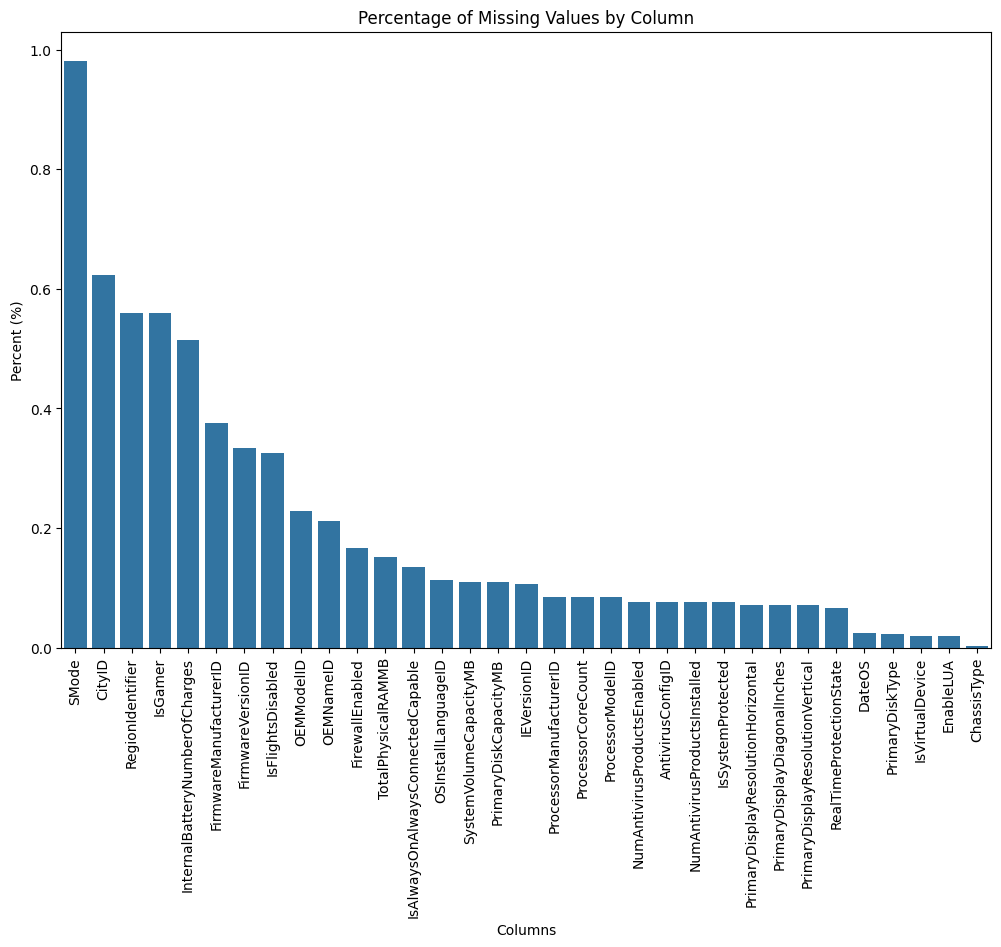

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count and percentage of missing values per column
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Create a DataFrame for better visualization
missing_df = pd.DataFrame({'Missing Values': missing_counts, 
                           'Percent (%)': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percent (%)', ascending=False)

print(missing_df)

# Visualize missing data pattern
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_df.index, y='Percent (%)', data=missing_df)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percent (%)')
plt.xlabel('Columns')
plt.show()


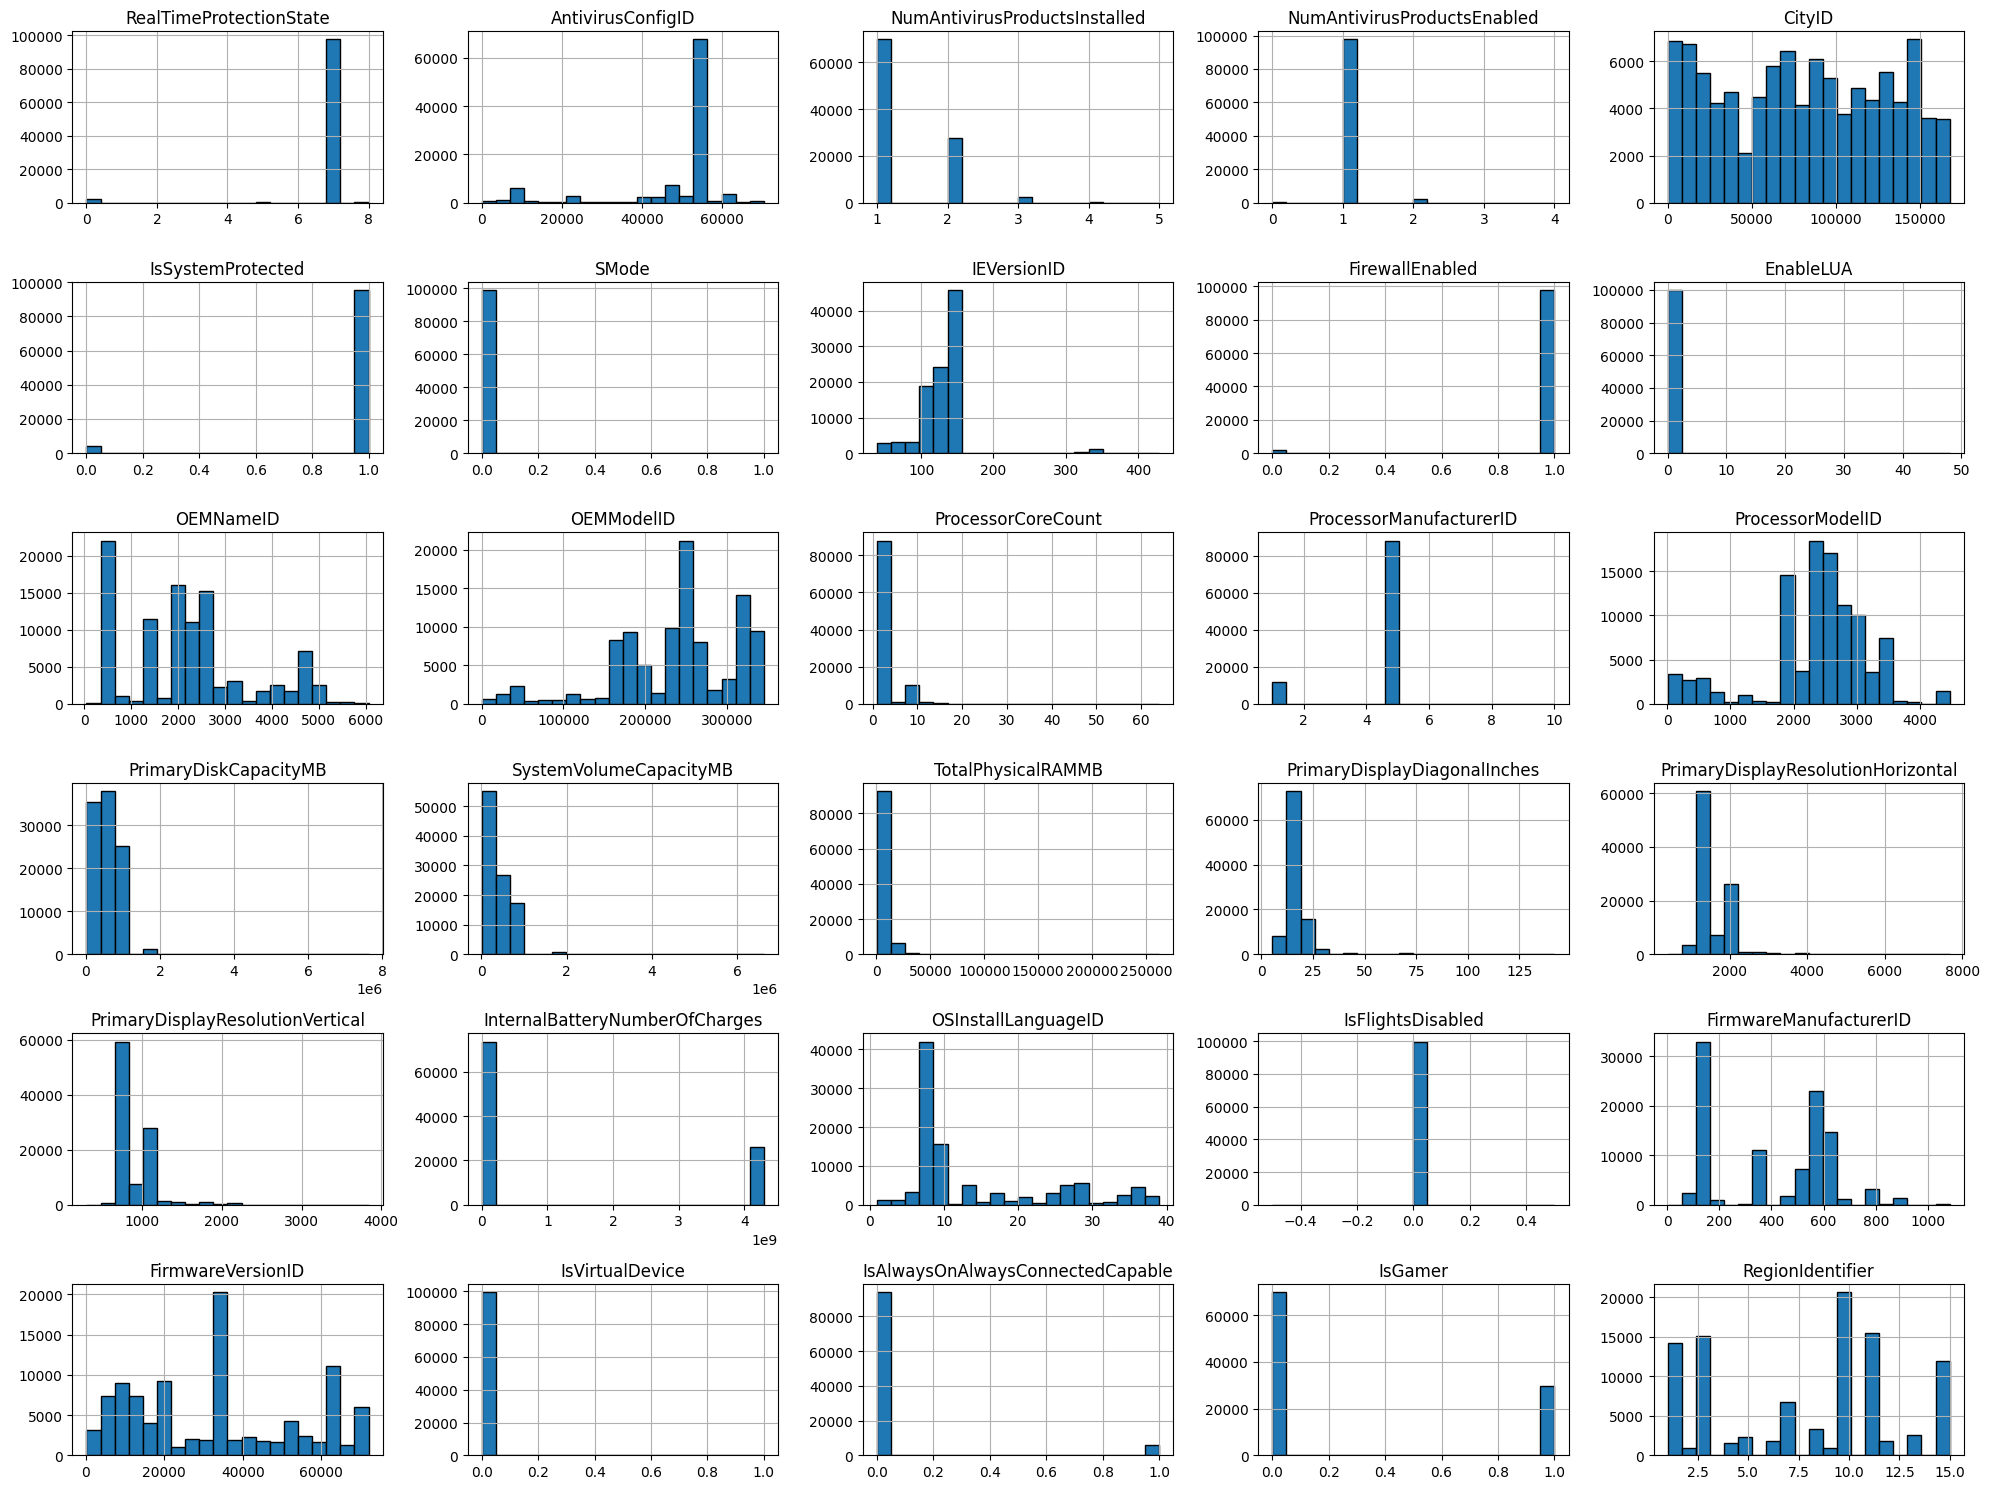

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# List of your columns
columns = ['RealTimeProtectionState', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'CityID', 'IsSystemProtected', 'SMode', 'IEVersionID',
       'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'TotalPhysicalRAMMB', 'ChassisType', 'PrimaryDisplayDiagonalInches',
       'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges',
       'OSInstallLanguageID', 'IsFlightsDisabled', 'FirmwareManufacturerID',
       'FirmwareVersionID', 'IsVirtualDevice',
       'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier',
       'DateOS']

# Plot histograms for all specified columns
df[columns].hist(bins=20, figsize=(20, 15), edgecolor='black')

# Adjust layout for readability
plt.tight_layout()
plt.show()


In [ ]:
mode=['RealTimeProtectionState','AntivirusConfigID','NumAntivirusProductsInstalled','NumAntivirusProductsEnabled','IsSystemProtected',,'IEVersionID','FirewallEnabled','EnableLUA','OEMNameID','ProcessorCoreCount','PrimaryDiskCapacityMB','PrimaryDiskType','TotalPhysicalRAMMB','ChassisType','PrimaryDisplayDiagonalInches','PrimaryDisplayResolutionHorizontal','PrimaryDisplayResolutionVertical','PowerPlatformRole',,'OSInstallLanguageID','FirmwareManufacturerID','IsVirtualDevice','IsAlwaysOnAlwaysConnectedCapable',]

In [ ]:
dontknow=['CityID','OEMModelID','ProcessorModelID','SystemVolumeCapacityMB','IsFlightsDisabled','FirmwareVersionID','RegionIdentifier']

In [ ]:
mode=['SMode','IsGamer','InternalBatteryNumberOfCharges',]

In [36]:
df1.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

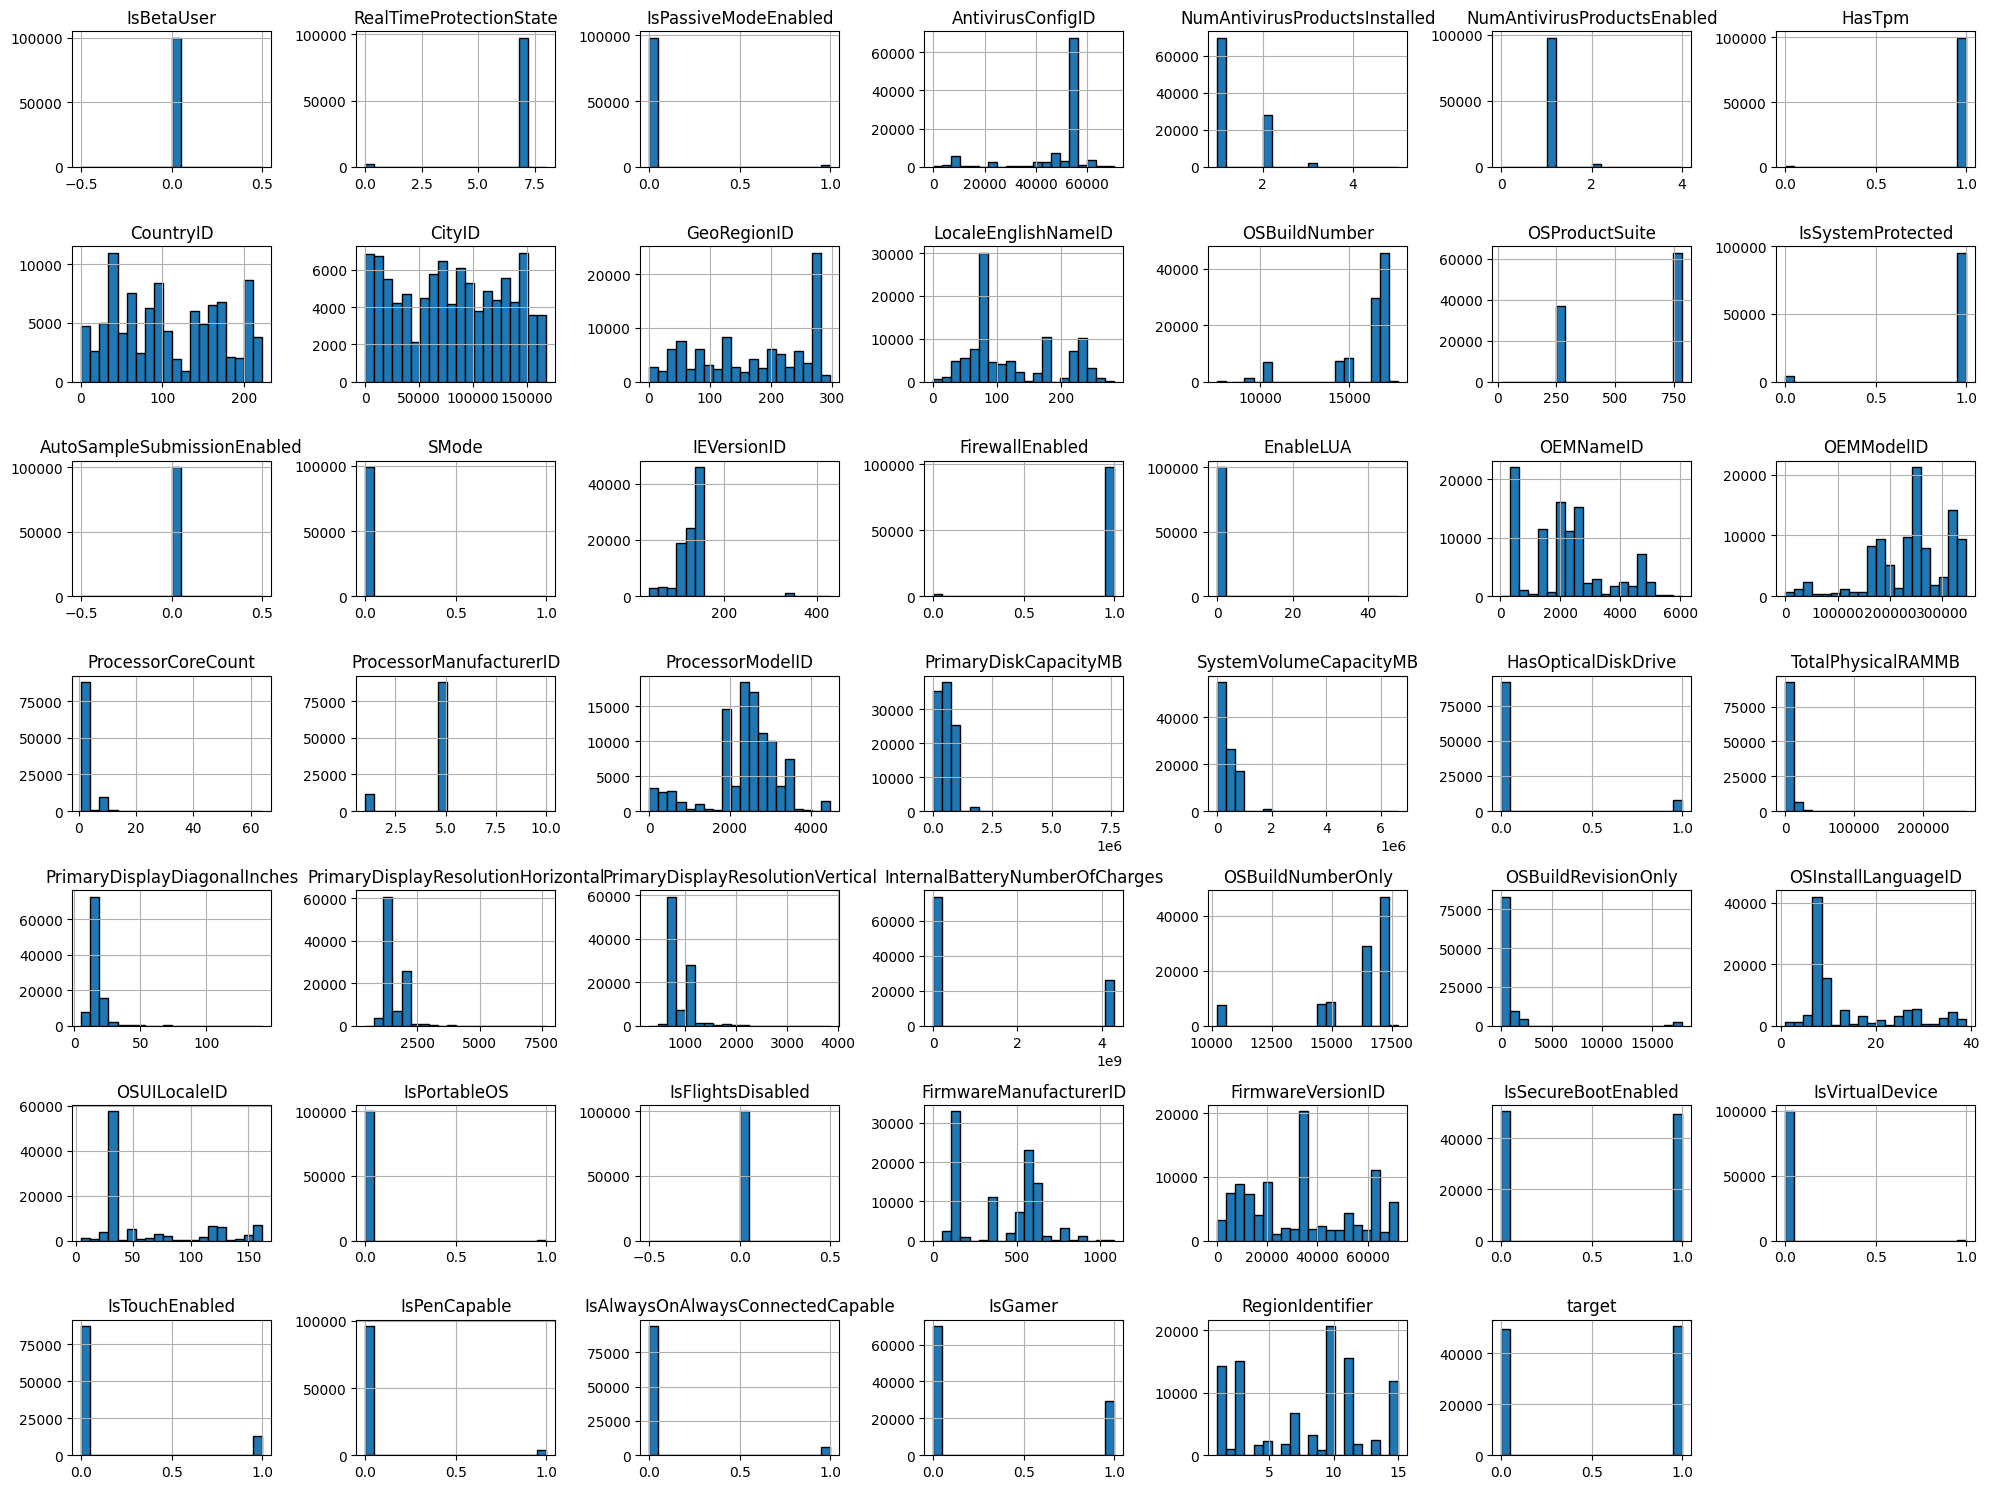

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# List of your columns
columns = ['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'PowerPlatformRole',
       'InternalBatteryNumberOfCharges', 'NumericOSVersion', 'OSArchitecture',
       'OSBranch', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSEdition',
       'OSSkuFriendlyName', 'OSInstallType', 'OSInstallLanguageID',
       'OSUILocaleID', 'AutoUpdateOptionsName', 'IsPortableOS',
       'OSGenuineState', 'LicenseActivationChannel', 'IsFlightsDisabled',
       'FlightRing', 'FirmwareManufacturerID', 'FirmwareVersionID',
       'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled',
       'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer',
       'RegionIdentifier', 'DateAS', 'DateOS', 'target']

# Plot histograms for all specified columns
df[columns].hist(bins=20, figsize=(20, 15), edgecolor='black')

# Adjust layout for readability
plt.tight_layout()
plt.show()


/tmp/ipykernel_7680/3280442786.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
/tmp/ipykernel_7680/3280442786.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
/tmp/ipykernel_7680/3280442786.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
/tmp/ipykernel_7680/3280442786.py:29: FutureWarning: 

Passing `palette` without assigning 

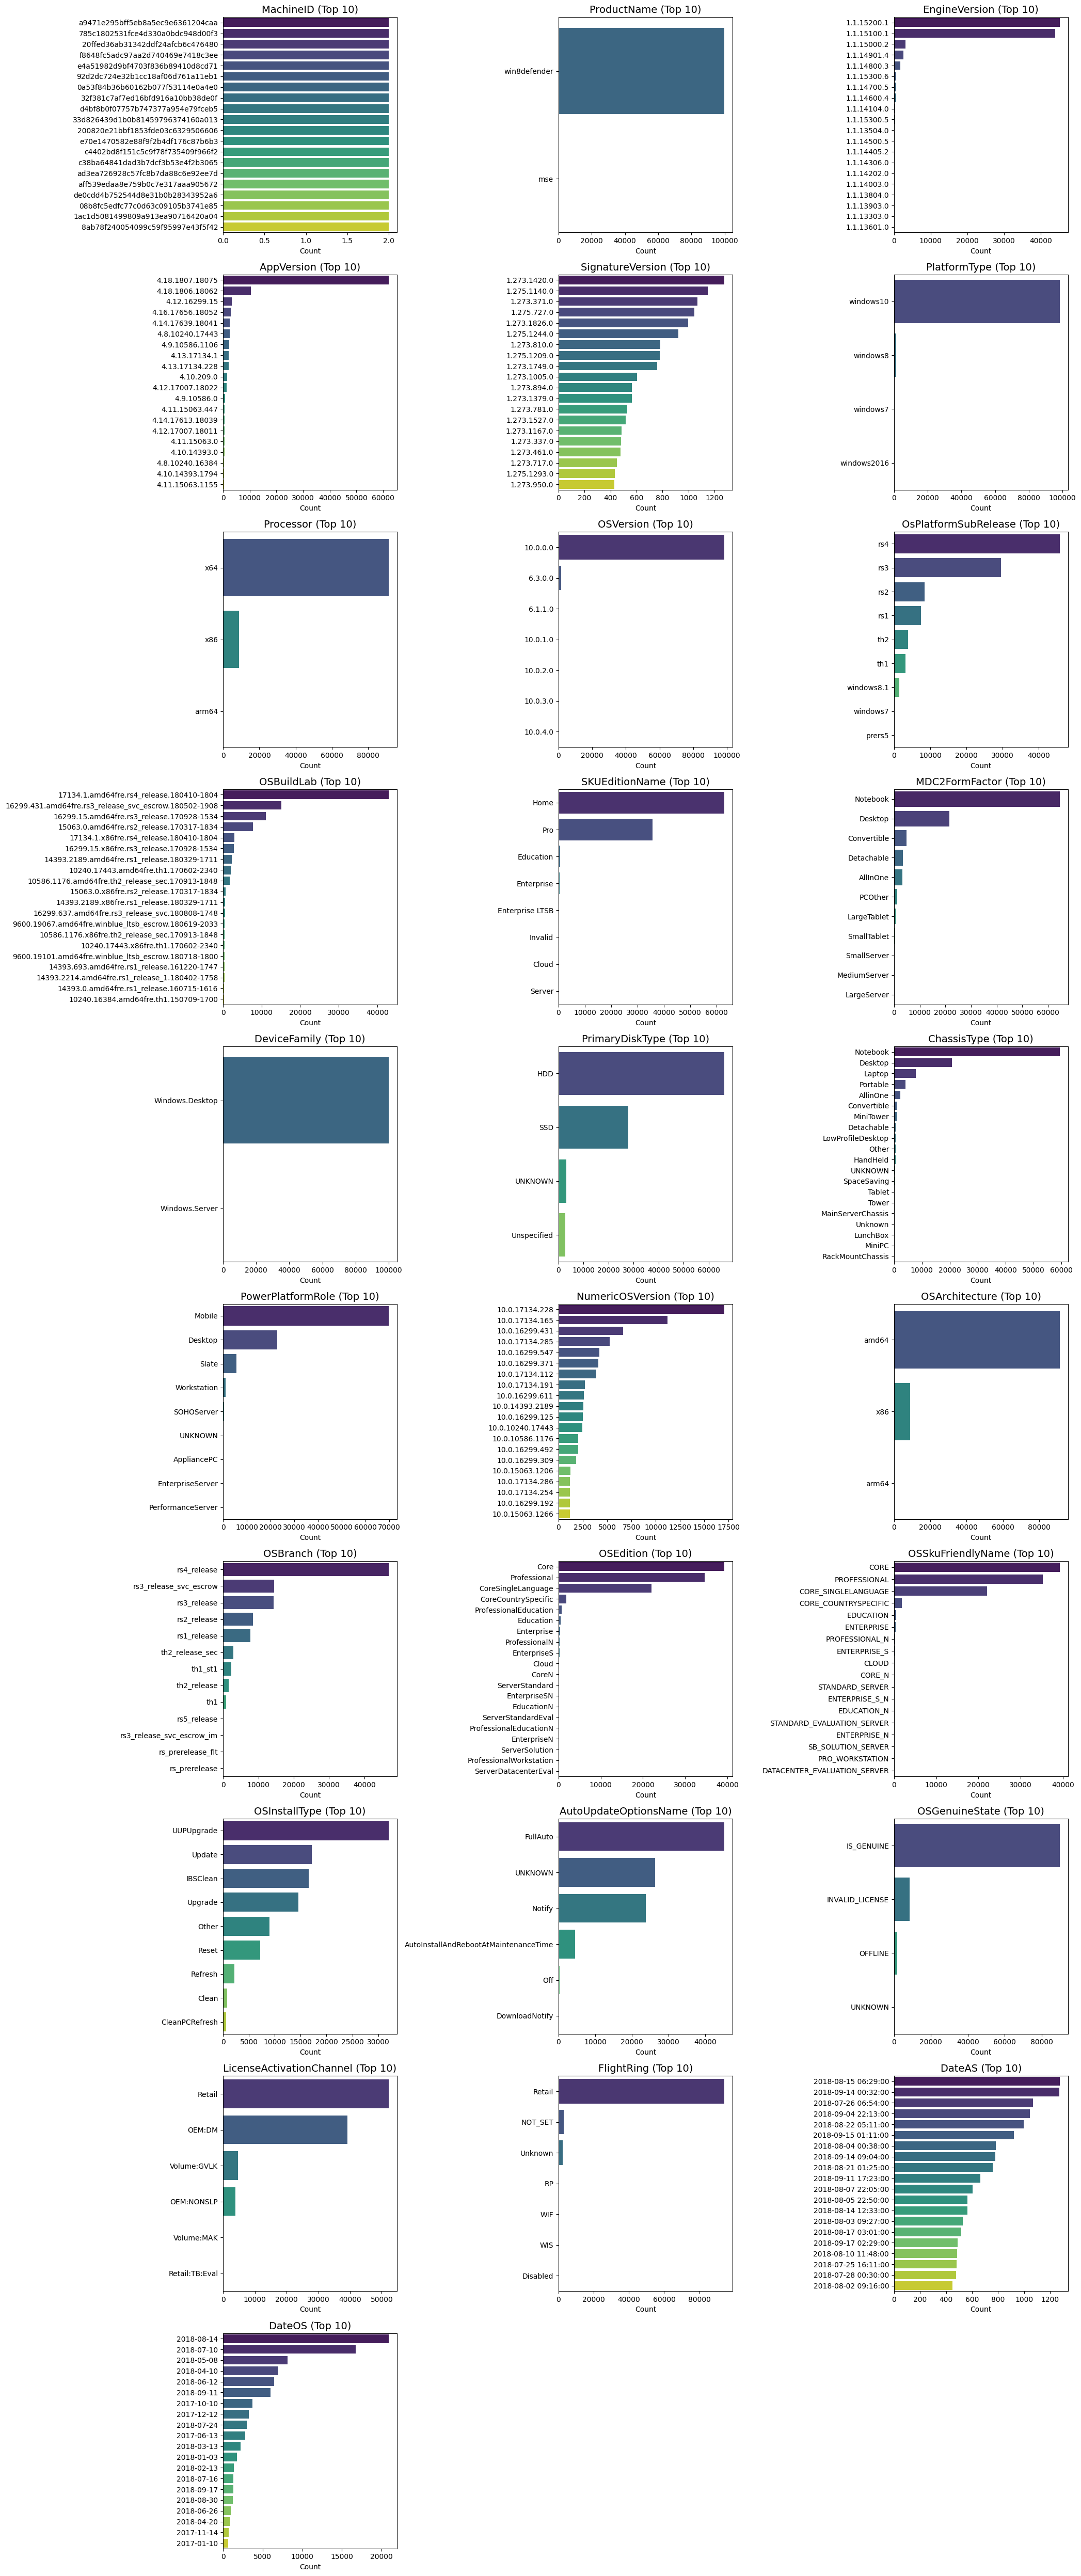

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your categorical columns list (example subset; replace with your actual categorical columns)
cat_columns = ['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
               'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion',
               'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName',
               'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType',
               'ChassisType', 'PowerPlatformRole', 'NumericOSVersion',
               'OSArchitecture', 'OSBranch', 'OSEdition',
               'OSSkuFriendlyName', 'OSInstallType',
               'AutoUpdateOptionsName', 'OSGenuineState',
               'LicenseActivationChannel','FlightRing','DateAS','DateOS']

# Set number of columns per row for subplots
n_cols = 3
n_rows = (len(cat_columns) + n_cols - 1) // n_cols

# Set figure size (adjust as needed)
plt.figure(figsize=(n_cols * 7, n_rows * 5))

for idx, col in enumerate(cat_columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    
    # Get top 10 categories for clarity
    top_categories = df[col].value_counts().nlargest(20)
    
    sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
    
    plt.title(f'{col} (Top 10)', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel('')

plt.tight_layout()
plt.show()
